# What Makes Successful Movies? IMDB

US, non-documentary movies from 2000-2022.

## Attributions

"This product uses the TMDB API but is not endorsed or certified by TMDB."

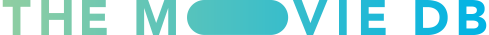

In [45]:
from IPython.core.display import SVG
SVG(filename='Data/tmdblogo-blue_long_2.svg')

## Import Packages

In [3]:
# Standard Imports
import numpy as np
import pandas as pd

# Additional Imports
import json, time, os
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook

## Load Data

In [230]:
## Load Data from three specific files
## from https://developer.imdb.com/non-commercial-datasets/

# title.basics.tsv.gz
basics_url = "https://datasets.imdbws.com/title.basics.tsv.gz"
basics = pd.read_csv(basics_url, sep='\t', low_memory=False)

# title.ratings.tsv.gz
ratings_url = "https://datasets.imdbws.com/title.ratings.tsv.gz"
ratings = pd.read_csv(ratings_url, sep='\t', low_memory=False)

# title.akas.tsv.gz
akas_url = "https://datasets.imdbws.com/title.akas.tsv.gz"
akas = pd.read_csv(akas_url, sep='\t', low_memory=False)

In [231]:
# Save Data copy to local disk
basics.to_csv('Data/basics.csv.gz', compression = 'gzip', index=False)
ratings.to_csv('Data/ratings.csv.gz', compression = 'gzip', index=False)
akas.to_csv('Data/akas.csv.gz', compression = 'gzip', index=False)

In [232]:
# Use files from local disk now, instead
basics = pd.read_csv("Data/basics.csv.gz", low_memory = False)
ratings = pd.read_csv("Data/ratings.csv.gz", low_memory = False)
akas = pd.read_csv("Data/akas.csv.gz", low_memory = False)

In [233]:
basics.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"


In [234]:
ratings.head(3)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1983
1,tt0000002,5.8,265
2,tt0000003,6.5,1839


In [235]:
akas.head(3)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0


In [236]:
basics_copy = basics

In [237]:
ratings_copy = ratings

In [238]:
akas_copy = akas

In [239]:
# Restore original copy of data due to error in processing
ratings = ratings_copy
akas = akas_copy

In [240]:
# Restore original copy of data due to error in processing
basics = basics_copy

## Data Cleaning

### Remove '\N' values

'\N' is the null value used that needs to be removed.

#### akas df

In [241]:
akas['language'].value_counts()

\N    6653810
ja    4225929
fr    4196752
hi    4163775
es    4132689
       ...   
sq          1
jv          1
su          1
rm          1
cr          1
Name: language, Length: 108, dtype: int64

In [242]:
# see if a working filter can be found for '\N'
filter_akas = akas == '\\N'
filter_akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,False,False,False,False,True,False,True,False
1,False,False,False,False,True,True,False,False
2,False,False,False,False,True,False,True,False
3,False,False,False,False,True,False,True,False
4,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...
36425028,False,False,False,False,False,True,True,False
36425029,False,False,False,False,False,True,True,False
36425030,False,False,False,False,False,True,True,False
36425031,False,False,False,False,True,False,True,False


In [243]:
# count the number of '\N' values (returned as 'True') in df
filter_akas.apply(pd.Series.value_counts)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
False,36425033.0,36425033.0,36425033.0,34529923,29771223,5598462,261989,36422955
True,NaN,NaN,NaN,1895110,6653810,30826571,36163044,2078


In [244]:
# replace all '\N' values with NaN
akas = akas.replace({'\\N':np.nan})

In [245]:
# Verify that all '\N' values have been replace with Nan: no 'True' values
filter_akas.apply(pd.Series.value_counts)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
False,36425033.0,36425033.0,36425033.0,34529923,29771223,5598462,261989,36422955
True,NaN,NaN,NaN,1895110,6653810,30826571,36163044,2078


In [246]:
# Create updated df filter to see if any '\N' values remain
filter_akas_nan = akas == '\\N'
filter_akas_nan

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
36425028,False,False,False,False,False,False,False,False
36425029,False,False,False,False,False,False,False,False
36425030,False,False,False,False,False,False,False,False
36425031,False,False,False,False,False,False,False,False


In [247]:
# count the number of '\N' values (returned as 'True') in df
filter_akas_nan.apply(pd.Series.value_counts)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
False,36425033,36425033,36425033,36425033,36425033,36425033,36425033,36425033


All '\N' values in 'akas' df have been removed.

Repeat for 'ratings' and 'basics'

#### ratings df

In [248]:
# see if a working filter can be found for '\N'
filter_ratings = ratings == '\\N'

# count the number of '\N' values (returned as 'True') in df
filter_ratings.apply(pd.Series.value_counts)

,tconst,averageRating,numVotes
False,1325919,1325919,1325919


No '\N' values found in 'ratings' df

#### basics df

In [249]:
# see if a working filter can be found for '\N'
filter_basics = basics == '\\N'

# count the number of '\N' values (returned as 'True') in df
filter_basics.apply(pd.Series.value_counts)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
False,9974457.0,9974457.0,9974457.0,9974457.0,9974456,8629813,109386,2954807,9526486
True,NaN,NaN,NaN,NaN,1,1344644,9865071,7019650,447971


In [250]:
# replace all '\N' values with NaN
basics = basics.replace({'\\N':np.nan})

# Verify that all '\N' values have been replace with Nan: no 'True' values
filter_basics.apply(pd.Series.value_counts)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
False,9974457.0,9974457.0,9974457.0,9974457.0,9974456,8629813,109386,2954807,9526486
True,NaN,NaN,NaN,NaN,1,1344644,9865071,7019650,447971


In [251]:
# Create updated df filter to see if any '\N' values remain
filter_basics_nan = basics == '\\N'

# count the number of '\N' values (returned as 'True') in df
filter_basics_nan.apply(pd.Series.value_counts)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
False,9974457,9974457,9974457,9974457,9974457,9974457,9974457,9974457,9974457


All '\N' values in 'basics' df have been removed.

All three dfs have been updated.

### Remove Movies w/ null runtimeMinutes

in basics df

In [252]:
# Count number of movies with a null value for 'runtimeMinutes' column
basics['runtimeMinutes'].isna().sum()

7019650

In [253]:
# Remove all movies with null values for 'runtimeMinutes'
basics.dropna(subset = ['runtimeMinutes'], inplace = True)

In [254]:
# Verify movies with a null value for 'runtimeMinutes' have been removed
basics['runtimeMinutes'].isna().sum()

0

All null values removed from 'runtimeMinutes'

### Remove Movies w/ null genre

in basics df

In [255]:
# Count number of movies with a null value for 'genres' column
basics['genres'].isna().sum()

76802

In [256]:
# Remove all movies with null values for 'genres'
basics.dropna(subset = ['genres'], inplace = True)

In [257]:
# Verify movies with a null value for 'genres' have been removed
basics['genres'].isna().sum()

0

All null values removed from 'genres'

### Remove non Movies

in basics df

In [258]:
# Check current values for 'titleType'
basics['titleType'].value_counts()

tvEpisode       1477481
short            605932
movie            384628
video            181787
tvMovie           92186
tvSeries          91134
tvSpecial         18433
tvMiniSeries      17406
tvShort            8694
videoGame           324
Name: titleType, dtype: int64

In [259]:
# Keep only movies
basics = basics.loc[basics['titleType'] == 'movie']
basics.titleType.value_counts()

movie    384628
Name: titleType, dtype: int64

Only movie titleType values remain

### Remove Movies outside of 2000-2022

in basics df

In [260]:
# Check current values for 'startYear'
basics['startYear'].value_counts()

2017    14390
2018    14361
2019    14114
2016    13979
2015    13488
        ...  
1899        1
1904        1
1897        1
1896        1
1894        1
Name: startYear, Length: 130, dtype: int64

In [261]:
basics.startYear.info()

<class 'pandas.core.series.Series'>
Int64Index: 384628 entries, 8 to 9974407
Series name: startYear
Non-Null Count   Dtype 
--------------   ----- 
378108 non-null  object
dtypes: object(1)
memory usage: 5.9+ MB


In [262]:
# Need to remove NaN values in order to coerce to value type integer
basics = basics.dropna(subset = ['startYear'])

In [263]:
basics.startYear = basics.startYear.astype(int)
basics.startYear.info()

<class 'pandas.core.series.Series'>
Int64Index: 378108 entries, 8 to 9974407
Series name: startYear
Non-Null Count   Dtype
--------------   -----
378108 non-null  int64
dtypes: int64(1)
memory usage: 5.8 MB


In [264]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378108 entries, 8 to 9974407
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          378108 non-null  object
 1   titleType       378108 non-null  object
 2   primaryTitle    378108 non-null  object
 3   originalTitle   378108 non-null  object
 4   isAdult         378108 non-null  object
 5   startYear       378108 non-null  int64 
 6   endYear         0 non-null       object
 7   runtimeMinutes  378108 non-null  object
 8   genres          378108 non-null  object
dtypes: int64(1), object(8)
memory usage: 28.8+ MB


In [265]:
# Keep only startYear values that include 2000 - 2022
basics = basics[(basics['startYear'] >= 2000) & (basics['startYear'] <= 2022)]
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223933 entries, 13082 to 9974407
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          223933 non-null  object
 1   titleType       223933 non-null  object
 2   primaryTitle    223933 non-null  object
 3   originalTitle   223933 non-null  object
 4   isAdult         223933 non-null  object
 5   startYear       223933 non-null  int64 
 6   endYear         0 non-null       object
 7   runtimeMinutes  223933 non-null  object
 8   genres          223933 non-null  object
dtypes: int64(1), object(8)
memory usage: 17.1+ MB


In [266]:
basics.startYear.value_counts()

2017    14390
2018    14361
2019    14114
2016    13979
2015    13488
2014    13129
2022    12976
2021    12437
2013    12402
2012    11657
2020    11604
2011    10787
2010    10217
2009     9375
2008     8165
2007     6974
2006     6532
2005     5853
2004     5219
2003     4603
2002     4140
2001     3881
2000     3650
Name: startYear, dtype: int64

Only movies from startYear 2000 through 2022 remain.

### Remove Documentary Movies

in basics df

In [267]:
# View values for 'genres'
basics.genres.value_counts()

Documentary                  53453
Drama                        36110
Comedy                       13476
Comedy,Drama                  6457
Horror                        5815
                             ...  
Comedy,Reality-TV,Romance        1
Crime,Family,Thriller            1
News,Reality-TV,Sport            1
Adult,Mystery                    1
Crime,Fantasy,Sci-Fi             1
Name: genres, Length: 1171, dtype: int64

In [268]:
# Create a filter for movies that are also documentaries
is_documentary = basics['genres'].str.contains('documentary', case = False)
is_documentary.value_counts()

False    147840
True      76093
Name: genres, dtype: int64

In [269]:
# Apply INVERSE of filter to df to remove all documentaries
basics = basics[~is_documentary]
basics.genres.value_counts()

Drama                        36110
Comedy                       13476
Comedy,Drama                  6457
Horror                        5815
Drama,Romance                 4317
                             ...  
Family,Musical,Sport             1
Horror,Music,Mystery             1
Comedy,History,Mystery           1
Animation,Biography,Sport        1
Crime,Fantasy,Sci-Fi             1
Name: genres, Length: 954, dtype: int64

In [270]:
# Create new filter to verify no documentaries remain
is_documentary_v = basics['genres'].str.contains('documentary', case = False)
is_documentary_v.value_counts()

False    147840
Name: genres, dtype: int64

No documentaries remain in updated basics df

### Remove non-US Movies

in basics df using region information from akas df

In [271]:
# View current values for values in akas 'region' column
akas.region.value_counts()

DE    4366701
FR    4361926
JP    4360736
IN    4303353
ES    4281672
       ...   
FM          2
TV          1
PW          1
NR          1
NU          1
Name: region, Length: 247, dtype: int64

In [272]:
# Count the total number of 'region' values of 'US'
print(f"Total value count for US:      {(akas['region'] == 'US').sum()}")
print(f"Total value count for non-US: {(akas['region'] != 'US').sum()}")

Total value count for US:      1448689
Total value count for non-US: 34976344


In [273]:
# Filter out all non-US movies
akas = akas[(akas['region'] == 'US')]

# Verify counts have been updated correctly
print(f"Total value count for US:     {(akas['region'] == 'US').sum()}")
print(f"Total value count for non-US: {(akas['region'] != 'US').sum()}")

Total value count for US:     1448689
Total value count for non-US: 0


All non-US movies have been removed from df akas. 

This filter now also needs to be applied to the df basics.

In [274]:
# Create additional filter in df basics to use US movie filter from df akas
keepers = basics['tconst'].isin(akas['titleId'])
keepers.value_counts()

True     86886
False    60954
Name: tconst, dtype: int64

In [275]:
# Apply 'keepers' filter to df basics
basics = basics[keepers]
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34803,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
42384,tt0043139,movie,Life of a Beijing Policeman,Wo zhe yi bei zi,0,2013,NaN,120,"Drama,History"
61115,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,NaN,70,Drama
67667,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
86799,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"


In [276]:
# Verify only US movies are now included in df basics
# Create a reverse filter between df akas and df basics
basics_US_filter = akas['titleId'].isin(basics['tconst'])

# Apply filter to akas and save to a copy of akas
akas2 = akas[basics_US_filter]

# Count US movies in filtered akas copy
akas2['region'].value_counts()

US    96669
Name: region, dtype: int64

Only US region movies appear to be included in df basics, now.

### Keep US Movies only

in akas df

In [277]:
# Use US movie filtered df akas2 to apply to main df akas
akas = akas2
akas['region'].value_counts()

US    96669
Name: region, dtype: int64

### Keep US Movies only

in ratings df

In [278]:
# Create additional filter in df ratings to use US movie filter from df akas
keepers_ratings = ratings['tconst'].isin(akas['titleId'])
keepers_ratings.value_counts()

False    1254127
True       71792
Name: tconst, dtype: int64

In [279]:
# Apply 'keepers' filter to df ratings
ratings = ratings[keepers_ratings]
ratings.head()

,tconst,averageRating,numVotes
17949,tt0035423,6.4,87019
24249,tt0043139,7.2,190
40738,tt0062336,6.4,175
46618,tt0069049,6.7,7731
63620,tt0088751,5.2,335


In [280]:
# Verify total count of df ratings matches True value from filter 'keepers_ratings'
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71792 entries, 17949 to 1325889
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         71792 non-null  object 
 1   averageRating  71792 non-null  float64
 2   numVotes       71792 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


Only values in df ratings that remain are those that remain from non-US movies being filtered out of df akas.

The reason that df ratings has fewer entries than the filtered (US-only movies) in akas is because some of those US-only movies do not have an associated rating.

## Deliverable

In [282]:
# display info for each of the DataFrames
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86886 entries, 34803 to 9974223
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          86886 non-null  object
 1   titleType       86886 non-null  object
 2   primaryTitle    86886 non-null  object
 3   originalTitle   86886 non-null  object
 4   isAdult         86886 non-null  object
 5   startYear       86886 non-null  int64 
 6   endYear         0 non-null      object
 7   runtimeMinutes  86886 non-null  object
 8   genres          86886 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.6+ MB


In [283]:
# display info for each of the DataFrames
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71792 entries, 17949 to 1325889
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         71792 non-null  object 
 1   averageRating  71792 non-null  float64
 2   numVotes       71792 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [284]:
# display info for each of the DataFrames
akas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96669 entries, 201726 to 36424290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   titleId          96669 non-null  object
 1   ordering         96669 non-null  int64 
 2   title            96669 non-null  object
 3   region           96669 non-null  object
 4   language         945 non-null    object
 5   types            88996 non-null  object
 6   attributes       4361 non-null   object
 7   isOriginalTitle  96669 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.6+ MB


In [286]:
# Save copy of processed DataFrames to local disk
basics.to_csv('Data/basics_final.csv.gz', compression = 'gzip', index=False)
ratings.to_csv('Data/ratings_final.csv.gz', compression = 'gzip', index=False)
akas.to_csv('Data/akas_final.csv.gz', compression = 'gzip', index=False)

# What Makes Successful Movies? TMDB

Get information on budget, revenue and movie certification (MPAA Rating)

## Load Data

In [19]:
# Check files created in first notebook ("IMDB-What_Makes_Successful_Movies")
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok = True)
os.listdir(FOLDER)

['basics_original.csv.gz',
 'basics_final.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'ratings_original.csv.gz',
 'akas_original.csv.gz',
 'ratings_final.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'akas_final.csv.gz']

In [20]:
# Load in the dataframe from first half of notebook 
basics = pd.read_csv('Data/basics_final.csv.gz')

In [36]:
# Specify years needed
YEARS_TO_GET = [2000, 2001]

In [22]:
# Define errors list
errors = []

## Connect to TMDB API

In [23]:
# Load API login credentials
with open('/Users/whitefreeze/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)

# Display the keys of the loaded dict
login.keys()

dict_keys(['client-id', 'api-key'])

In [24]:
# Set API_KEY variable
tmdb.API_KEY =  login['api-key']

In [25]:
# Test API 
movie = tmdb.Movies(603) # 'The Matrix'
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/oMsxZEvz9a708d49b6UdZK1KAo5.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 81.99,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film 

In [26]:
# Test that movies can be found via IMDB ID #
# Get movie object for the current ID
movie = tmdb.Movies('tt0133093')
info = movie.info()
print(info['budget'])
print(info['original_title'])

63000000
The Matrix


## Functions

In [27]:
# Accept movie_id argument. Return dictionary results that include certification/rating.
def get_movie_with_rating(movie_id):
    """Adapted from source = https://girhub.com/celiao/tmdbsimple"""

    # Get movie object for the current ID
    movie = tmdb.Movies(movie_id)

    # Save the .info & .releases dictionaries
    info = movie.info()
    releases = movie.releases()

    # Loop throu countries in releases
    for c in releases['countries']:

        # if the country abbreviation is 'US'
        if c['iso_3166_1'] == 'US':

            # Save a 'certification' key in the info dict with the certification
            info['certification'] = c['certification']
            
    return info

In [28]:
def write_json(new_data, filename):
    """Appends a list of records (new_data) to a json file (filename).
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""
    
    with open(filename, 'r+') as file:
        
        # First load existing data into a dict
        file_data = json.load(file)
        
        # Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list): 
            file_data.extend(new_data)
        else: 
            file_data.append(new_data)
            
        # Sets file's current position at offset.
        file.seek(0)
        
        # Convert back to json
        json.dump(file_data, file)

### Test Functions 

In [29]:
# Test function
test = get_movie_with_rating("tt0848228")  # 'The Avengers'
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 149.052,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [30]:
# Test function by looping through a list of IDs
test_ids = ["tt0848228", "tt0115937", "tt0848228", "tt0332280"]
results = []
# errors = []  # previously initialized
for movie_id in test_ids:
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except Exception as e:
       errors.append([movie_id,e])
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.709,28816,PG-13
1,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.709,28816,PG-13
2,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.880,10407,PG-13


In [31]:
# Check error list
print(f"- Number of errors: {len(errors)}")
errors

- Number of errors: 1


[['tt0115937',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0115937?api_key=9bd8d2d73ba74745aca770c997410e22')]]

## Loops

### Outer Loop

In [40]:
# OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc = 'YEARS', position = 0):
    
    # Defining the JSON file to store the results in for each year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)
    
    # If file does NOT exist, create it
    if file_exists == False:
        
        # Save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE, 'w') as f:
            json.dump([{'imdb_id': 0 }], f)
            
    # Saving new year as the current df
    df = basics.loc[basics['startYear'] == YEAR].copy()
    
    # Saving movie IDs to list
    movie_ids = df['tconst'].copy()
    
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    # If code just above has an error, use code below:
    ## previous_df = read_and_fix_json(JSON_FILE)
    
    # Filter out any IDs that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

YEARS:   0%|          | 0/1 [00:00<?, ?it/s]

### Inner Loop

In [41]:
# INNER Loop
for movie_id in tqdm_notebook(movie_ids_to_get,
                             desc = f'Movies from {YEAR}',
                             position = 1,
                             leave = True):
    try: 
        # Retrieve the data for the movie ID
        temp = get_movie_with_rating(movie_id)
        
        # Append/extend results to existing file using a pre-made function
        write_json(temp, JSON_FILE)
        
        # Short 20 ms sleep to prevent overwhelming server
        time.sleep(0.02)
        
    except Exception as e:
        errors.append([movie_id, e])

Movies from 2000:   0%|          | 0/1455 [00:00<?, ?it/s]

## Deliverable

In [42]:
# Compress results into csv for each year
final_year_df = pd.read_json(JSON_FILE)
final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz",
                    compression="gzip", index = False)

In [43]:
# Print number of movie IDs that caused an error
print(f"- Total errors: {len(errors)}")
errors

- Total errors: 441


[['tt0115937',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0115937?api_key=9bd8d2d73ba74745aca770c997410e22')],
 ['tt0151685',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0151685?api_key=9bd8d2d73ba74745aca770c997410e22')],
 ['tt0160270',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0160270?api_key=9bd8d2d73ba74745aca770c997410e22')],
 ['tt0160480',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0160480?api_key=9bd8d2d73ba74745aca770c997410e22')],
 ['tt0192110',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0192110?api_key=9bd8d2d73ba74745aca770c997410e22')],
 ['tt0193365',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt019

In [44]:
# Compress error results into csv for each year
error_year_df = pd.DataFrame(errors)
error_year_df.to_csv(f"{FOLDER}error_file.csv", index = False)